Objetivo: avaliar quais atributos influenciam um usuário na compra de produtos online e construir um modelo preditivo para realizar previsões de compras futuras.

Usaremos como fonte de dados o dataset:

Online Shoppers Purchasing Intention Dataset

https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

O conjunto de dados consiste em vetores de recursos pertencentes a 12.330 sessões online. O conjunto de dados foi formado de modo que cada sessão pertença a um usuário diferente em um período de 1 ano para evitar qualquer tendência para uma campanha específica, dia especial, usuário, perfil ou período.

O conjunto de dados consiste em 10 atributos numéricos e 8 categóricos. O atributo 'Revenue' pode ser usado como o rótulo da classe.



Dicionário de Dados:


"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.



"Administrativo", "Duração administrativa", "Informativo", "Duração informativo", "Relacionado ao produto" e "Duração relacionada ao produto" representam o número de diferentes tipos de páginas visitadas pelo visitante nessa sessão e o tempo total gasto em cada uma dessas categorias de página. Os valores desses recursos são derivados das informações de URL das páginas visitadas pelo usuário e atualizadas em tempo real quando um usuário executa uma ação, por exemplo, passando de uma página para outra. 

Os recursos "Taxa de rejeição", "Taxa de saída" e "Valor da página" representam as métricas medidas pelo "Google Analytics" para cada página no site de comércio eletrônico. 

O valor do recurso "Taxa de rejeição" de uma página da web refere-se à porcentagem de visitantes que entram no site a partir dessa página e saem ("rejeição") sem acionar outras solicitações ao servidor durante essa sessão. 

O valor do recurso "Taxa de saída" para uma página da web específica é calculado como a porcentagem que foi a última na sessão, para todas as exibições de página a página. 

O recurso "Valor da página" representa o valor médio para uma página da web que um usuário visitou antes de concluir uma transação de comércio eletrônico. 

O recurso "Dia especial" indica a proximidade do horário de visita do site a um dia especial específico (por exemplo, dia das mães, dia dos namorados) em que as sessões têm mais probabilidade de serem finalizadas com a transação. O valor desse atributo é determinado considerando a dinâmica do comércio eletrônico, como a duração entre a data do pedido e a data de entrega. Por exemplo, no dia dos namorados, esse valor assume um valor diferente de zero entre 2 e 12 de fevereiro (dia dos namorados nos EUA e Europa), zero antes e depois dessa data, a menos que esteja próximo de outro dia especial e seu valor máximo de 1 em 8 de fevereiro. 

O conjunto de dados também inclui o tipo de sistema operacional, navegador, região, tipo de tráfego, tipo de visitante como visitante novo ou recorrente, um valor booleano indicando se a data da visita é final de semana e mês do ano.

A variável alvo (Revenue) é booleana, com True se a sessão gerou receita e False se não gerou.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

#Warnings
import warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Carregando os dados
data = pd.read_csv('online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
#Verificando shape
data.shape

(12330, 18)

In [4]:
#Verificando os valores Nan
data.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [5]:
#Retirando os linhas com valores Nan
data = data.dropna()
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [6]:
#Verificando os tipos de variáveis
data.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [7]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.895952,0.061497,2.124147,2.357584,3.148019,4.070477
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.577926,0.199020,0.911566,1.718028,2.402211,4.024598
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [8]:
data.drop(columns= ["ProductRelated_Duration","ExitRates"], axis = 1, inplace=True)

In [9]:
# Contando os valores únicos por coluna
valore_unicos = data.nunique()
valore_unicos

Administrative               27
Administrative_Duration    3336
Informational                17
Informational_Duration     1259
ProductRelated              311
BounceRates                1872
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [10]:
data['TrafficType'].value_counts()

2     3909
1     2444
3     2051
4     1069
13     737
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      37
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

In [11]:
quali_cols = ['SpecialDay','Month','OperatingSystems','Browser', 'Region','TrafficType','VisitorType','Weekend']
quali_cols2 = ['SpecialDay','Month','OperatingSystems','Browser', 'Region','TrafficType','VisitorType','Weekend','Revenue']

In [12]:
data_int= data.drop(quali_cols,axis=1)

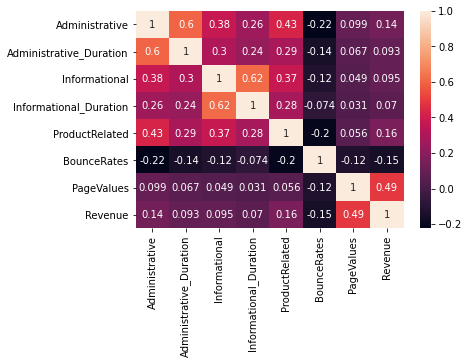

In [13]:

corr = data_int.corr()
sns.heatmap(corr, annot=True)

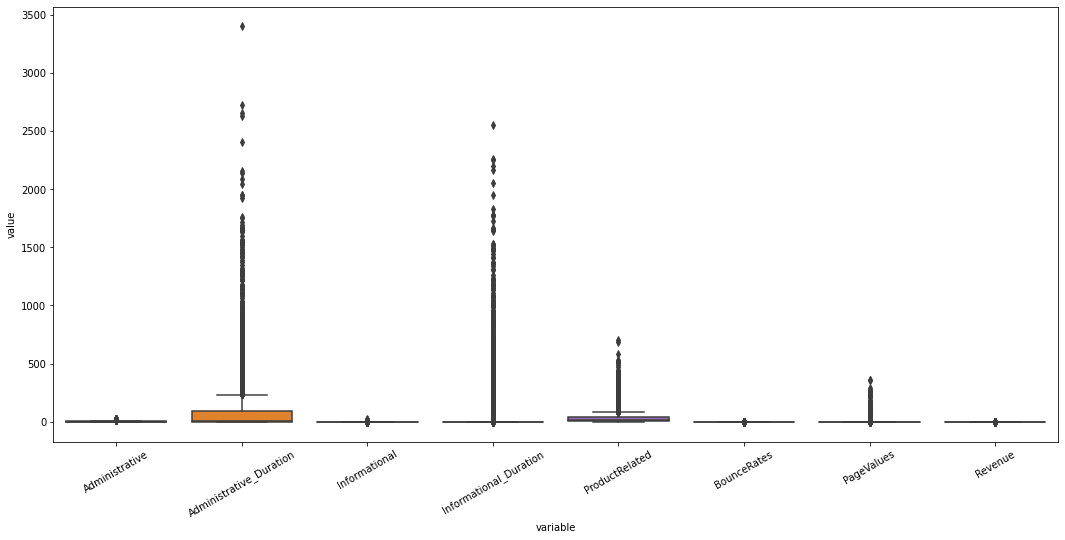

In [14]:
# Tamanho da figura
f, ax = plt.subplots(figsize = (18, 8))


# Cria o boxplot
ax = sns.boxplot(x = "variable", y = "value", data = pd.melt(data_int))

# Faz a rotação do label
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)

# Show
plt.show()

In [15]:
data_quali = data[quali_cols2]

In [16]:
data_quali.head()

,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [17]:
data_quali['VisitorType'] = data_quali['VisitorType'].astype('category')
data_quali['VisitorType'] = data_quali['VisitorType'].cat.codes
data_quali['Weekend'] = data_quali['Weekend'].astype('category')
data_quali['Weekend'] = data_quali['Weekend'].cat.codes
data_quali['Revenue'] = data_quali['Revenue'].astype('category')
data_quali['Revenue'] = data_quali['Revenue'].cat.codes

In [18]:
data_quali.head()

,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,Feb,1,1,1,1,2,0,0
1,0.0,Feb,2,2,1,2,2,0,0
2,0.0,Feb,4,1,9,3,2,0,0
3,0.0,Feb,3,2,2,4,2,0,0
4,0.0,Feb,3,3,1,4,2,1,0


In [19]:
data_quali['Month'].value_counts()

May     3363
Nov     2998
Mar     1894
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [20]:
data_quali['Month'] = data_quali['Month'].map({'May': 5, 'Nov': 11, 'Feb': 2, 'Mar': 3, 'Dec': 12, 'Oct': 10,
                                          'Sep': 9, 'Aug': 8, 'Jul': 7, 'June': 6})

In [21]:
data_quali.head()

,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,2,1,1,1,1,2,0,0
1,0.0,2,2,2,1,2,2,0,0
2,0.0,2,4,1,9,3,2,0,0
3,0.0,2,3,2,2,4,2,0,0
4,0.0,2,3,3,1,4,2,1,0


In [22]:
# Vamos transformar as colunas em float
for col in data_quali:
    data_quali[col] = data_quali[col].apply(lambda x: float(x))
data_quali.dtypes

SpecialDay          float64
Month               float64
OperatingSystems    float64
Browser             float64
Region              float64
TrafficType         float64
VisitorType         float64
Weekend             float64
Revenue             float64
dtype: object

In [23]:
# Função para calcular a associação entre variáveis categóricas

# Pacote stats do Scipy
import scipy.stats as ss


# A Associação é um resultado no intervalo de [0,1], em que 0 significa nenhuma associação e 1 é associação completa.

# Função
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    
    # Teste qui-quadrado de independência de variáveis em uma tabela de contingência.
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [24]:
# Coleta o nome das colunas do dataset

# Lista
categorical_vars = []

# Loop
for column in data_quali:
    categorical_vars.append(column)
categorical_vars

['SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend',
 'Revenue']

In [25]:
# Variável alvo
y = 'Revenue'

# Print
print('\nA Associação é um resultado no intervalo de [0,1], em que 0 significa nenhuma associação e 1 é associação completa.')
print('\n')

# Loop
for var in categorical_vars:
    print('Associação da Variável ' + var + ' com a variável resposta:', 
          cramers_v(data_quali[var], data_quali[y]))


A Associação é um resultado no intervalo de [0,1], em que 0 significa nenhuma associação e 1 é associação completa.


Associação da Variável SpecialDay com a variável resposta: 0.08612574191302486
Associação da Variável Month com a variável resposta: 0.17429559788320026
Associação da Variável OperatingSystems com a variável resposta: 0.07431482114710405
Associação da Variável Browser com a variável resposta: 0.035674404263105565
Associação da Variável Region com a variável resposta: 0.010316104131858175
Associação da Variável TrafficType com a variável resposta: 0.16939260390924352
Associação da Variável VisitorType com a variável resposta: 0.10378200154823138
Associação da Variável Weekend com a variável resposta: 0.027594474992535235
Associação da Variável Revenue com a variável resposta: 0.9996898803372318


In [26]:
# Concatena as variáveis em um novo dataset
data_final = pd.concat([data_int.drop('Revenue', axis = 1), data_quali], axis = 1)

In [27]:
data_final.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.20,0.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0
1,0.0,0.0,0.0,0.0,2.0,0.00,0.0,0.0,2.0,2.0,2.0,1.0,2.0,2.0,0.0,0.0
2,0.0,-1.0,0.0,-1.0,1.0,0.20,0.0,0.0,2.0,4.0,1.0,9.0,3.0,2.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.05,0.0,0.0,2.0,3.0,2.0,2.0,4.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,10.0,0.02,0.0,0.0,2.0,3.0,3.0,1.0,4.0,2.0,1.0,0.0


In [28]:
data_final.shape

(12316, 16)

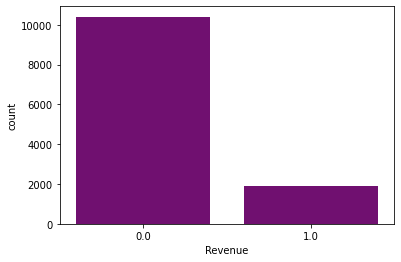

In [29]:
#Verificando o balanceamento da variável Revenue
sns.countplot(x= data_final['Revenue'], data=data_final, color= 'purple')

In [30]:
# Define X (variáveis explicativas) e y (variável target)
X = data_final.drop('Revenue', axis = 1)
y = data_final['Revenue']

In [31]:
# Aplica a divisão com proporção 80/20
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.20, random_state = 121)

In [32]:
X_treino.shape,X_teste.shape

((9852, 15), (2464, 15))

In [33]:
y_treino.shape,y_teste.shape

((9852,), (2464,))

## Verificando a importância das variáveis

In [34]:
# Cria o seletor de variáveis

# Cria o estimador
estimador_rfc = RandomForestClassifier(random_state = 121)

# Cria o seletor
seletor_f1 = RFECV(estimator = estimador_rfc, step = 1, cv = StratifiedKFold(10), scoring = 'f1')

# Treinamos o seletor
seletor_f1 = seletor_f1.fit(X_treino, y_treino)

In [35]:
print('Número Ideal de Atributos: {}'.format(seletor_f1.n_features_))

Número Ideal de Atributos: 14


In [36]:
# Vamos avaliar a acurácia do modelo com F1 Score
previsoes_seletor_f1 = seletor_f1.predict(X_teste)
from sklearn.metrics import accuracy_score
acc_seletor_f1 = accuracy_score(y_teste, previsoes_seletor_f1)
acc_seletor_f1

0.9030032467532467

In [37]:
# Relatório de Classificação
print(classification_report(y_teste, previsoes_seletor_f1))

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94      2074
         1.0       0.77      0.56      0.64       390

    accuracy                           0.90      2464
   macro avg       0.84      0.76      0.79      2464
weighted avg       0.90      0.90      0.90      2464



In [38]:
# Cria um dataframe com os resultados
resultado_seletor_f1 = pd.DataFrame()
resultado_seletor_f1['Atributo'] = X_treino.columns[np.where(seletor_f1.support_ == True)]
resultado_seletor_f1['Score'] = seletor_f1.estimator_.feature_importances_
resultado_seletor_f1.sort_values('Score', inplace = True, ascending = True)

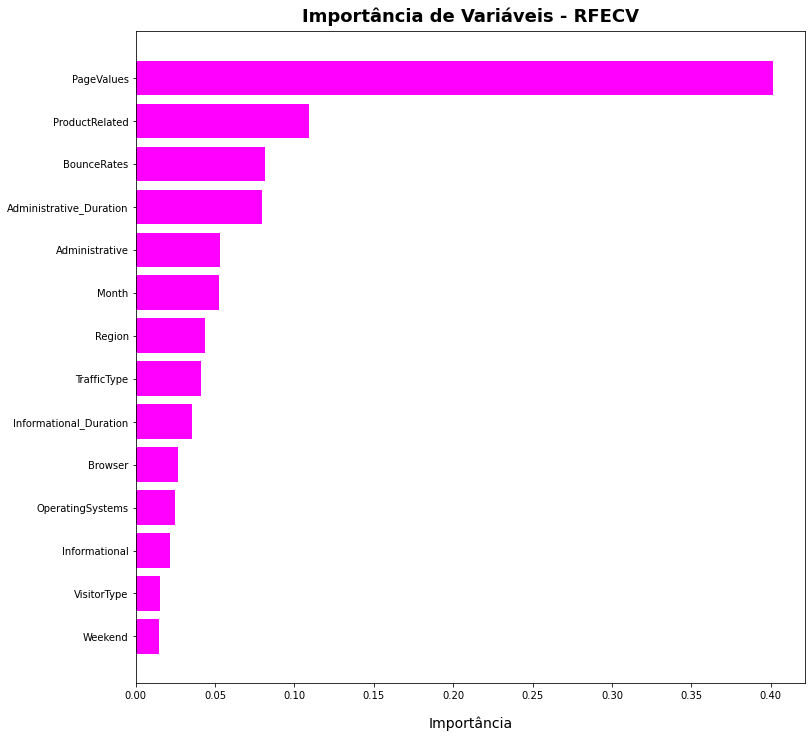

In [39]:
# Plot 
plt.figure(figsize = (12, 12))
plt.barh(y = resultado_seletor_f1['Atributo'], width = resultado_seletor_f1['Score'], color = 'Magenta')
plt.title('Importância de Variáveis - RFECV', fontsize = 18, fontweight = 'bold', pad = 10)
plt.xlabel('Importância', fontsize = 14, labelpad = 15)
plt.show()

In [40]:
# Extrai as variáveis e quais são importante ou não para o modelo
variaveis_rfecv = pd.Series(seletor_f1.support_, index = X_treino.columns)
variaveis_rfecv

Administrative              True
Administrative_Duration     True
Informational               True
Informational_Duration      True
ProductRelated              True
BounceRates                 True
PageValues                  True
SpecialDay                 False
Month                       True
OperatingSystems            True
Browser                     True
Region                      True
TrafficType                 True
VisitorType                 True
Weekend                     True
dtype: bool

In [41]:
# Registra os atributos para remoção
atributos_para_remover = variaveis_rfecv[variaveis_rfecv == False].index
print(atributos_para_remover)

Index(['SpecialDay'], dtype='object')


In [42]:
#Verificando a variável PageValues
data_final['PageValues'].value_counts()

0.000000     9586
53.988000       6
42.293068       3
40.278152       2
12.558857       2
             ... 
1.625051        1
20.157102       1
8.191923        1
12.587222       1
30.203577       1
Name: PageValues, Length: 2704, dtype: int64

In [43]:
#Aplicar o SMOTE para gerar valores sintéticos e equilibrar a variável target
seed = 121
smote_bal = SMOTE(random_state = seed)
X_res, y_res = smote_bal.fit_resample(X_treino, y_treino)

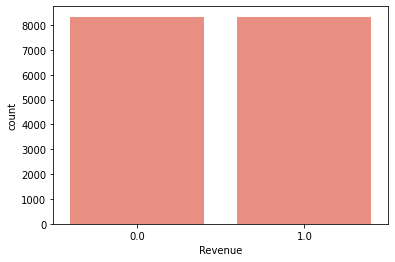

In [44]:
#Verificando o balanceamento da variável Revenue
sns.countplot(x= y_res, data=data_final, color= 'salmon')

## Modelo 1 - Suport vector Machine

In [45]:
modelo1 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
modelo1.fit(X_res, y_res)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [46]:
resultado = modelo1.predict(X_teste)

In [47]:
# Relatório de Classificação
print(classification_report(y_teste, resultado))

              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93      2074
         1.0       0.63      0.71      0.67       390

    accuracy                           0.89      2464
   macro avg       0.79      0.82      0.80      2464
weighted avg       0.89      0.89      0.89      2464



## Modelo 2 - Modelo SVM sem a variável PageValues

In [48]:
X2 = X_res.drop('PageValues', axis = 1)
X2_teste = X_teste.drop('PageValues', axis = 1)

In [49]:
X2.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'BounceRates', 'SpecialDay',
       'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'VisitorType', 'Weekend'],
      dtype='object')

In [50]:
modelo2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
modelo2.fit(X2, y_res)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [51]:
resultado2 = modelo2.predict(X2_teste)

In [52]:
# Relatório de Classificação
print(classification_report(y_teste, resultado2))

              precision    recall  f1-score   support

         0.0       0.89      0.84      0.86      2074
         1.0       0.34      0.44      0.38       390

    accuracy                           0.78      2464
   macro avg       0.61      0.64      0.62      2464
weighted avg       0.80      0.78      0.79      2464



## Modelo 3 - Modelo SVM sem a variável SpecialDay

In [53]:
# Registra os atributos para remoção
atributos_para_remover = variaveis_rfecv[variaveis_rfecv == False].index
print(atributos_para_remover)

Index(['SpecialDay'], dtype='object')


In [54]:
X3 = X_res.drop('SpecialDay', axis = 1)
X3_teste = X_teste.drop('SpecialDay', axis = 1)

In [55]:
modelo3 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
modelo3.fit(X3, y_res)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [56]:
resultado3 = modelo3.predict(X3_teste)

In [57]:
# Relatório de Classificação
print(classification_report(y_teste, resultado3))

              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93      2074
         1.0       0.63      0.72      0.67       390

    accuracy                           0.89      2464
   macro avg       0.79      0.82      0.80      2464
weighted avg       0.89      0.89      0.89      2464



## Modelo 4 - Otimização dos Hiperparâmetros

In [58]:
scaler = StandardScaler()
scaler.fit(X3)
scaler.fit_transform(X3_teste)

array([[ 1.07994403,  0.2975967 , -0.41519205, ..., -0.75906518,
         0.41065273, -0.55234477],
       [-0.68678083, -0.47416632, -0.41519205, ...,  2.15839735,
         0.41065273, -0.55234477],
       [-0.68678083, -0.47416632, -0.41519205, ..., -0.02969955,
        -2.47210603, -0.55234477],
       ...,
       [-0.68678083, -0.47416632, -0.41519205, ...,  3.86025049,
         0.41065273,  1.81046342],
       [-0.68678083, -0.47416632, -0.41519205, ..., -0.75906518,
         0.41065273, -0.55234477],
       [-0.68678083, -0.47416632, -0.41519205, ..., -0.5159433 ,
        -2.47210603, -0.55234477]])

# Cria o modelo


modelo4 = SVC( )

# Valores para o grid
r_range =  np.array([0.5, 1])
gamma_range =  np.array([0.001, 0.01])
d_range = np.array([2,3, 4])

# Grid de hiperparâmetros
param_grid_poly = dict(gamma = gamma_range, degree = d_range, coef0 = r_range)

# Grid Search

modelo_v4_grid_search_poly = GridSearchCV(modelo4, param_grid_poly, cv = 3)

# Treinamento
modelo_v4_grid_search_poly.fit(X3, y_res)


# Acurácia em Treino
print(f"Acurácia em Treinamento: {modelo_v4_grid_search_poly.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {modelo_v4_grid_search_poly.best_params_}")

In [61]:
# Previsões
previsoes_v4 = modelo_v4_grid_search_poly.predict(X3_teste)

In [62]:
modelo4 = make_pipeline(StandardScaler(), SVC(gamma= 0.001, degree = 2, coef0 = 0.5))
modelo4.fit(X3, y_res)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(coef0=0.5, degree=2, gamma=0.001))])

In [63]:
resultado4 = modelo4.predict(X3_teste)

In [64]:
# Relatório de Classificação
print(classification_report(y_teste, resultado4))

              precision    recall  f1-score   support

         0.0       0.95      0.89      0.91      2074
         1.0       0.54      0.73      0.62       390

    accuracy                           0.86      2464
   macro avg       0.74      0.81      0.77      2464
weighted avg       0.88      0.86      0.87      2464

